In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("DataSets/melb_data.csv")
df.sample(5).T

,11905,4485,9865,9968,4846
Suburb,Brighton,Northcote,Donvale,Mount Waverley,Prahran
Address,6/105 Cochrane St,14 Northcote St,40 Astelot Dr,5 Armstrong St,395 High St
Rooms,2,2,3,3,2
Type,u,h,h,h,h
Price,845000.0,1050000.0,902000.0,1200000.0,1310000.0
Method,SP,S,S,VB,S
SellerG,Buxton,Barry,Hoskins,McGrath,Marshall
Date,29/07/2017,27/06/2016,24/06/2017,24/06/2017,18/03/2017
Distance,10.5,5.5,16.1,14.2,4.5
Postcode,3186.0,3070.0,3111.0,3149.0,3181.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

# Null %

In [4]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [5]:
null_cols = ["Car","BuildingArea","YearBuilt"]
null_vals = [62,6450,5375]
for i,j in zip(null_vals,null_cols):
    print (f"{j} ==========> {(((i)/13580)*100)} " )

Car ==========> 0.45655375552282773 
BuildingArea ==========> 47.49631811487481 
YearBuilt ==========> 39.58026509572901 


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


# EDA

In [7]:
# Unique Sububr
len(df.Suburb.value_counts())

314

3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64


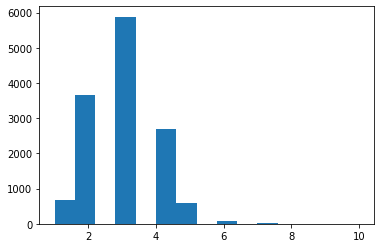

In [8]:
print(df.Rooms.value_counts())
plt.hist(df.Rooms,bins=15)
plt.show()

h    9449
u    3017
t    1114
Name: Type, dtype: int64


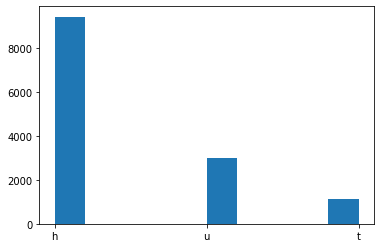

In [9]:
print(df.Type.value_counts())

plt.hist(df.Type)
plt.show()

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64


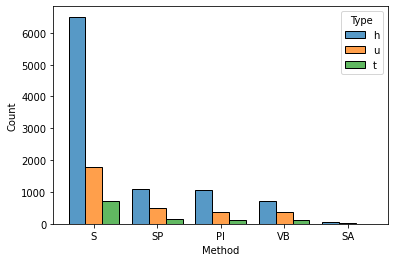

In [10]:
print(df.Method.value_counts())

sns.histplot(data=df,x=df.Method,hue=df.Type,multiple="dodge",shrink=0.8)
plt.show()

Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
                 ... 
Prowse              1
Luxe                1
Zahn                1
Homes               1
Point               1
Name: SellerG, Length: 268, dtype: int64


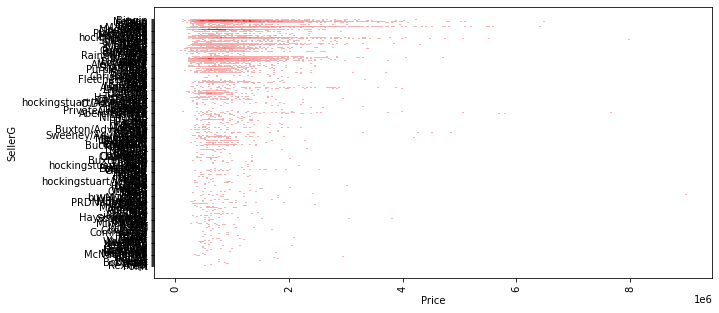

In [11]:
print(df.SellerG.value_counts())
plt.figure(figsize=(10,5))
# sns.histplot(df.SellerG,kde=True)
# sns.histplot(df.Price,kde=True,color="Red")
sns.histplot(data=df,y=df.SellerG,x=df.Price,bins=250,kde=True,color="Red")
plt.xticks(rotation=90)
plt.show()

11.2    739
9.2     367
13.9    324
7.8     306
4.6     263
       ... 
37.5      1
29.3      1
47.4      1
39.8      1
48.1      1
Name: Distance, Length: 202, dtype: int64


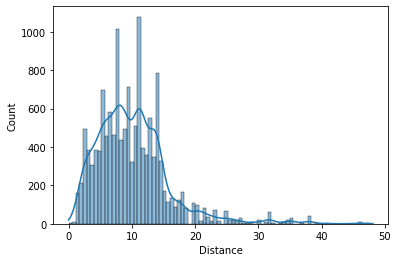

In [12]:
print(df.Distance.value_counts())
sns.histplot(df.Distance,kde=True)
plt.show()

3073.0    359
3020.0    306
3121.0    292
3040.0    290
3046.0    284
         ... 
3340.0      1
3158.0      1
3808.0      1
3777.0      1
3793.0      1
Name: Postcode, Length: 198, dtype: int64


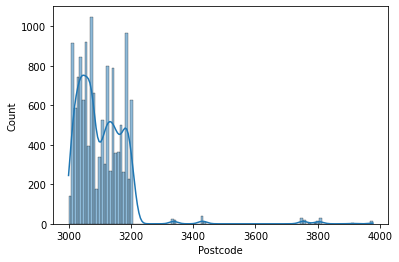

In [13]:
print(df.Postcode.value_counts())
sns.histplot(df.Postcode,kde=True)
plt.show()

3.0     5896
2.0     3737
4.0     2601
1.0      691
5.0      556
6.0       63
0.0       16
7.0       10
8.0        5
9.0        3
20.0       1
10.0       1
Name: Bedroom2, dtype: int64


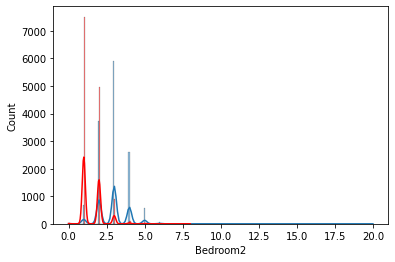

In [14]:
print(df.Bedroom2.value_counts())
sns.histplot(df.Bedroom2,kde=True)
sns.histplot(df.Bathroom,kde=True,color='Red')
plt.show()

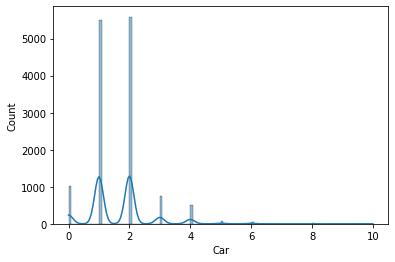

In [15]:
sns.histplot(df.Car,kde=True)
plt.show()

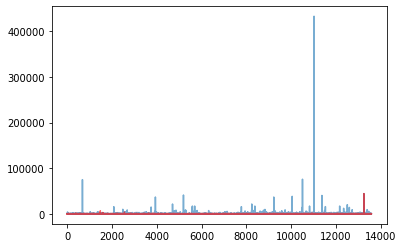

In [16]:
plt.plot(df.Landsize,alpha=0.6)
plt.plot(df.BuildingArea,color="Red",alpha=0.6)
plt.show()

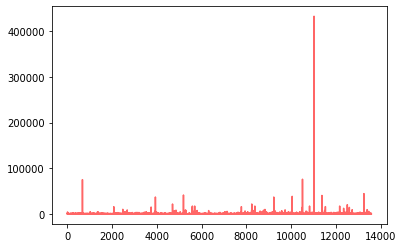

In [17]:
plt.plot(df.Landsize,color='Red',alpha=0.6)
plt.show()

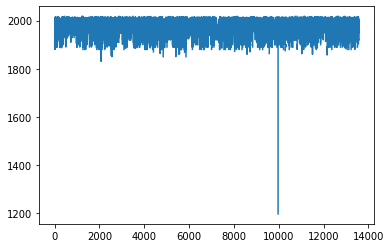

In [18]:
plt.plot(df.YearBuilt)
plt.show()

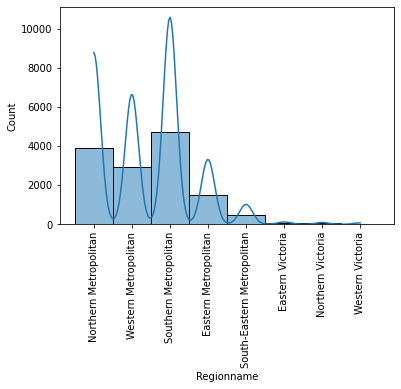

In [19]:
sns.histplot(df.Regionname,kde=True)
plt.xticks(rotation=90)
plt.show()

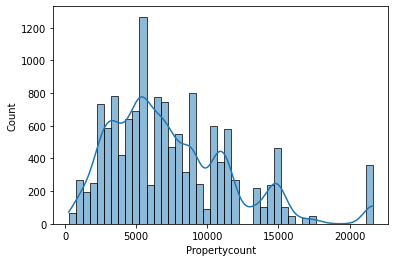

In [20]:
sns.histplot(df.Propertycount,kde=True)
plt.show()

# Droping cols

In [21]:
# address,council area,lat,long
df.drop(columns=df[["Address","CouncilArea","Lattitude","Longtitude"]],axis=1,inplace=True)
df

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
0,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0
2,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0
3,Abbotsford,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,4019.0
4,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,7392.0
13576,Williamstown,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,Western Metropolitan,6380.0
13577,Williamstown,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,Western Metropolitan,6380.0
13578,Williamstown,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,Western Metropolitan,6380.0


# Outliers

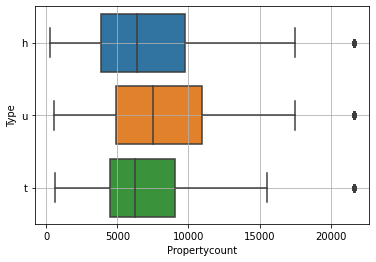

In [22]:
sns.boxplot(data=df,x="Propertycount",y="Type")
plt.grid()

In [23]:
out1 = df[ (df.Propertycount > 17000) & (df.Type == "h") ].index
df.drop(out1,inplace=True)

In [24]:
out2 = df[ (df.Propertycount > 20000) & (df.Type == "u") ].index
df.drop(out2,inplace=True)

In [25]:
out3 = df[ (df.Propertycount > 20000) & (df.Type == "t") ].index
df.drop(out3,inplace=True)

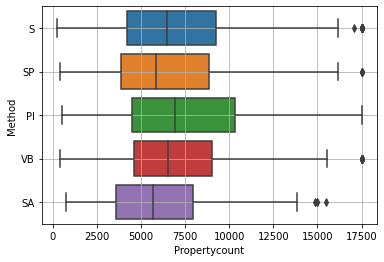

In [26]:
sns.boxplot(data=df,x="Propertycount",y="Method")
plt.grid()

In [27]:
out4 = df[ (df.Propertycount > 16000) & (df.Method == "S") ].index
df.drop(out4,inplace=True)

In [28]:
out5 = df[ (df.Propertycount > 16000) & (df.Method == "SP") ].index
df.drop(out5,inplace=True)

In [29]:
out6 = df[ (df.Propertycount > 16000) & (df.Method == "VB") ].index
df.drop(out6,inplace=True)

In [30]:
out7 = df[ (df.Propertycount > 14000) & (df.Method == "SA") ].index
df.drop(out7,inplace=True)

In [31]:
# sns.pairplot(df)
# plt.grid()

# Handling Missing Values

In [32]:
df.fillna(value=np.NaN,inplace=True)

In [33]:
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6210
YearBuilt        5172
Regionname          0
Propertycount       0
dtype: int64

In [34]:
# Car
df.dropna(subset="Car",inplace=True)

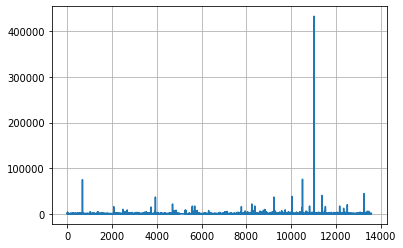

In [35]:
plt.plot(df.Landsize)
plt.grid()

In [36]:
# # Getting mean of BuildingArea depending upon the LandSize[0:2000:4000:6000:...] for filling BuildingArea
# l1 = [x for x in range(0,14000,2000)]
# l2 = [x for x in range(2000,16000,2000)]
# mean_list = []

# for i,j in zip(l1,l2):
#     sample = df[ (df.Landsize > i) & (df.Landsize < j)]
#     mean_list.append(sample.BuildingArea.mean())

In [37]:
# Getting mean of BuildingArea depending upon the LandSize[0:2000:4000:6000:...] for filling BuildingArea

    
# -- Getting Values for Replacing
l1 = [x for x in range(0,14000,2000)]
l2 = [x for x in range(2000,16000,2000)]
mean_list = []

for i,j in zip(l1,l2):
    sample = df[ (df.Landsize > i) & (df.Landsize < j)]
    mean_list.append(sample.BuildingArea.mean())


# -- Replacing
def Get_BuildingArea(val):
    BuildingArea = val[0]
    LandSize = val[1]
    
    if(pd.isna(BuildingArea)):
        if (LandSize < 2000):
            return mean_list[0]
        
        elif (LandSize < 4000):
            return mean_list[1]
        
        elif (LandSize < 6000):
            return mean_list[2]
        
        elif (LandSize < 8000):
            return mean_list[3]
        
        elif (LandSize < 10000):
            return mean_list[4]
        
        else: 
            return np.mean(mean_list[:5])
   
    
    else:
        return BuildingArea
    
    

In [38]:
df.BuildingArea = df[["BuildingArea","Landsize"]].apply(Get_BuildingArea,axis=1)


In [39]:
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt        5141
Regionname          0
Propertycount       0
dtype: int64

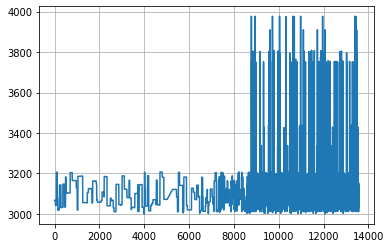

In [40]:
# YearBuilt will be replaced with mean of yearbuilt with same postcode assuming that the area has the same years of building
plt.plot(df.Postcode)
plt.grid()

In [41]:
# YearBuilt will be replaced with mean of yearbuilt with same postcode assuming that the area has the same years of building

    
# -- Geting Values for Replacement
PostCode_List = df.Postcode.unique()

PostCode_mean_list = {}

for i in PostCode_List:
    sample = df[df.Postcode == i]
    PostCode_mean_list[i] = (sample.YearBuilt.mean())

# -- Replacing
def Get_YearBuilt(val):
    Postcode = val[0]
    YearBuilt = val[1]
    
    if(pd.isna(YearBuilt)):
        return PostCode_mean_list[Postcode]

    else:
        return YearBuilt

In [42]:
# Checking Function
Get_YearBuilt([3067,np.NaN])

1945.1842105263158

In [43]:
df.YearBuilt = df[["Postcode","YearBuilt"]].apply(Get_YearBuilt,axis=1)

In [44]:
df["YearBuilt"].replace(to_replace=np.NaN,value=df.YearBuilt.mean(),inplace=True)

In [45]:
df.YearBuilt = df[["YearBuilt"]].apply(round,axis=1)

In [46]:
df.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Regionname       0
Propertycount    0
dtype: int64

# Cleaned DataFrame

In [47]:
df.sample(5).T

,2041,3766,5017,881,7989
Suburb,Coburg North,Maidstone,Preston,Bentleigh East,Heidelberg West
Rooms,4,2,3,3,3
Type,h,h,h,h,h
Price,820000.0,830000.0,1030000.0,1189000.0,855000.0
Method,SP,S,S,S,S
SellerG,Brad,Rendina,Love,hockingstuart,Barry
Date,4/03/2017,27/11/2016,28/05/2016,17/09/2016,8/04/2017
Distance,9.2,9.2,8.8,13.9,9.4
Postcode,3058.0,3012.0,3072.0,3165.0,3081.0
Bedroom2,4.0,2.0,3.0,4.0,3.0


# Feature Engineering (Date)

In [48]:
df.Date = pd.to_datetime(df.Date)

In [49]:
df.Date = df.Date.dt.year

In [50]:
df.sample(5).T

,15,13102,9677,2716,7899
Suburb,Abbotsford,Balwyn North,Ormond,Footscray,Glenroy
Rooms,2,4,2,2,3
Type,h,h,h,h,h
Price,1310000.0,1400000.0,695000.0,835000.0,895000.0
Method,S,VB,S,SP,S
SellerG,Jellis,hockingstuart,Buxton,Jas,Barry
Date,2016,2017,2017,2016,2017
Distance,2.5,9.7,11.4,6.4,13.0
Postcode,3067.0,3104.0,3204.0,3011.0,3046.0
Bedroom2,2.0,4.0,2.0,2.0,3.0


# Segregating

In [51]:
# Bringing Price to Last
new_col_list = df.columns.tolist()
new_col_list = new_col_list[4:] + new_col_list[0:4]
new_col_list
df = df[new_col_list]

In [52]:
X = df.iloc[:,:-1]
X

,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Suburb,Rooms,Type
0,S,Biggin,2016,2.5,3067.0,2.0,1.0,1.0,202.0,157.707259,1945.0,Northern Metropolitan,4019.0,Abbotsford,2,h
1,S,Biggin,2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.0,Northern Metropolitan,4019.0,Abbotsford,2,h
2,SP,Biggin,2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.0,Northern Metropolitan,4019.0,Abbotsford,3,h
3,PI,Biggin,2017,2.5,3067.0,3.0,2.0,1.0,94.0,157.707259,1945.0,Northern Metropolitan,4019.0,Abbotsford,3,h
4,VB,Nelson,2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.0,Northern Metropolitan,4019.0,Abbotsford,4,h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,S,Barry,2017,16.7,3150.0,4.0,2.0,2.0,652.0,157.707259,1981.0,South-Eastern Metropolitan,7392.0,Wheelers Hill,4,h
13576,SP,Williams,2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.000000,1995.0,Western Metropolitan,6380.0,Williamstown,3,h
13577,S,Raine,2017,6.8,3016.0,3.0,2.0,4.0,436.0,157.707259,1997.0,Western Metropolitan,6380.0,Williamstown,3,h
13578,PI,Sweeney,2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.000000,1920.0,Western Metropolitan,6380.0,Williamstown,4,h


In [53]:
Y = df.iloc[:,-1]
Y

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13024, dtype: float64

# Encoding

In [54]:
# Getting list of all categorial values which needs to be encoded
# df_scalling = list(X.columns)
df_cat = df.select_dtypes(['object']).columns
print("Unique Values\n===============")
for i in df_cat:
    print(f"{i} ---> {len(df[i].unique())}")

Unique Values
Method ---> 5
SellerG ---> 263
Regionname ---> 8
Suburb ---> 310
Type ---> 3


In [55]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


CT = ColumnTransformer(transformers=[ ("Trans1_encoding", OrdinalEncoder(), df_cat ) ] , remainder="passthrough" )
X = CT.fit_transform(X)
X

array([[1.000e+00, 2.200e+01, 2.000e+00, ..., 1.945e+03, 4.019e+03,
        2.000e+00],
       [1.000e+00, 2.200e+01, 2.000e+00, ..., 1.900e+03, 4.019e+03,
        2.000e+00],
       [3.000e+00, 2.200e+01, 2.000e+00, ..., 1.900e+03, 4.019e+03,
        3.000e+00],
       ...,
       [1.000e+00, 1.890e+02, 6.000e+00, ..., 1.997e+03, 6.380e+03,
        3.000e+00],
       [0.000e+00, 2.170e+02, 6.000e+00, ..., 1.920e+03, 6.380e+03,
        4.000e+00],
       [3.000e+00, 2.340e+02, 6.000e+00, ..., 1.920e+03, 6.543e+03,
        4.000e+00]])

In [56]:
CT.transformers_

[('Trans1_encoding',
  OrdinalEncoder(),
  Index(['Method', 'SellerG', 'Regionname', 'Suburb', 'Type'], dtype='object')),
 ('remainder', 'passthrough', [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14])]

# Splitting

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

# Modelling

In [72]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def Calculate_Model(model,coef = 0):
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    
    print(f"R2 ---> {r2_score(Y_test,Y_pred)}")    
    print(f"MAE ---> {mean_absolute_error(Y_test,Y_pred)}")    
    print(f"MSE ---> {mean_squared_error(Y_test,Y_pred)}")    
    print(f"RMSE ---> {np.sqrt(mean_squared_error(Y_test,Y_pred))}")    

    
    if(coef==1):
        print(model.coef_)

# LinearRegression

In [73]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
Calculate_Model(LR,1)

R2 ---> 0.5587388326326368
MAE ---> 290470.47338299744
MSE ---> 180761280720.6359
RMSE ---> 425160.3000288666
[-1.20890228e+04 -2.41786489e+02  1.70482450e+04 -6.22222600e+02
 -1.95551312e+05  6.22986356e+04 -4.71472899e+04  1.82173049e+03
  1.38143074e+04  2.37277342e+05  5.85944121e+04  2.61657512e+00
  3.37963866e+01 -3.32047075e+03  3.09360369e+00  1.72376399e+05]


# SVR

In [74]:
from sklearn.svm import SVR
SVR = SVR()
Calculate_Model(SVR)

R2 ---> -0.06721546344994334
MAE ---> 444115.00043649884
MSE ---> 437181533849.9395
RMSE ---> 661197.046159418


# Hypertuning

In [76]:
def Get_Max_Test(Values_List):
    max_val = 0
    max_index = 0
    for i in Values_List:
        if max_val < i[-1]:
            max_val = i[-1]
            max_index = Values_List.index(i)
    return Values_List[max_index]

def Get_Max_Train(Values_List):
    max_val = 0
    max_index = 0
    for i in Values_List:
        if max_val < i[1]:
            max_val = i[1]
            max_index = Values_List.index(i)
    return Values_List[max_index]

In [77]:
# Ridge
from sklearn.linear_model import Ridge
L2 = Ridge(alpha=3)
Calculate_Model(L2,1)

R2 ---> 0.5587393150579603
MAE ---> 290457.70086822566
MSE ---> 180761083096.58514
RMSE ---> 425160.06761757995
[-1.20867722e+04 -2.41836283e+02  1.70473619e+04 -6.22225536e+02
 -1.95445429e+05  6.22061718e+04 -4.71433524e+04  1.82171772e+03
  1.42738682e+04  2.37084127e+05  5.86065858e+04  2.61762812e+00
  3.38073678e+01 -3.32076489e+03  3.09315021e+00  1.72010404e+05]


In [78]:
Ridge_List = []

for i in range(100):
    L2 = Ridge(alpha = i)
    L2.fit(X_train,Y_train)   
    L2_train = L2.score(X_train,Y_train) # Train Acc
    L2_test  = L2.score(X_test,Y_test)   # Test Acc   
    Ridge_List.append([i,L2_train,L2_test])

In [79]:
print("Best Train : ",Get_Max_Train(Ridge_List))
print("Best Test : ",Get_Max_Test(Ridge_List))

Best Train :  [0, 0.5385896606130307, 0.5587388326326364]
Best Test :  [11, 0.5385884930147791, 0.5587398374084744]


In [80]:
# Lasso
from sklearn.linear_model import Lasso
L1 = Lasso(alpha=3)
Calculate_Model(L1,1)

R2 ---> 0.5587391393026663
MAE ---> 290469.8820026819
MSE ---> 180761155094.20102
RMSE ---> 425160.1522887593
[-1.20865988e+04 -2.41786634e+02  1.70473638e+04 -6.22222678e+02
 -1.95547137e+05  6.22852907e+04 -4.71465939e+04  1.82172197e+03
  1.38154199e+04  2.37271949e+05  5.85924648e+04  2.61663146e+00
  3.37969482e+01 -3.32048370e+03  3.09364468e+00  1.72376700e+05]


In [83]:
Lasso_List = []
for i in range(1,300):

    L1 = Lasso(alpha = i)
    L1.fit(X_train,Y_train)
    
    L1_train = L1.score(X_train,Y_train) # Train Acc
    L1_test  = L1.score(X_test,Y_test)   # Test Acc
    
    Lasso_List.append([i,L1_train,L1_test])

In [84]:
print("Best Train : ",Get_Max_Train(Lasso_List))
print("Best Test : ",Get_Max_Test(Lasso_List))

Best Train :  [1, 0.5385896605911453, 0.5587389348995137]
Best Test :  [299, 0.5385877040303941, 0.5587674708784698]
